In [16]:
import os
os.getcwd()
os.chdir(path)

# Spectral Clustering 

Part 1.3.1: Spectral clustering on initial 30 points adjacency matrix. 


In [1]:
# Importing libraries to be used in this code
import numpy as np
import pandas as pd
import networkx as nx
import copy
%matplotlib inline  
# Don't use plt.show() as it opens a new window and blocks the evaluation of cell. 
import matplotlib.pyplot as plt


Class to carry out Spectral Clustering

In [7]:

"""Creating a class for Spectral Clustering which would have the following methods: 
i) adjacencyMatrix()-> to create a adjacency matrix
ii) graphPlot() -> to plot the network graph from the adjacency matrix
iii) normLaplacian()-> to create a normalised Laplacian matrix from the adjacency matrix
iv) laplacianEmbed()_-> to find low dimensional embeddings of normalised Laplacian
v)  kMeans()-> Find the K-Means clustering of embeddings
"""

class spectralClust(object): 
    """ Methods-> adjacencyMatrix,graphPlot,normLaplacian,laplacianEmbed,kMeans
        attributes-> edges, N
    """
    
    def __init__(self,N,edge=0):
        """Constructor to initialise the object attributes
        """
        
        self.edge=edge
        self.N=N
        
        
    def adjacencyMatrix(self):
        """This method creates a Graph and the corresponding adjacencymatrix
        """
        G=nx.Graph()
        # Creating three separate groups of nodes (7,8 and 15 nodes each)
        node_clusters = [range(1,16), range(16,31)]
        # Adding edges between each set of nodes in each group.
        for x in node_clusters:
            for y in x: 
                if(y!=x[-1]):
                    G.add_edge(y,y+1,len=2)
                else: 
                    G.add_edge(y,x[0],len=2)
        # Adding an extra edge in other cluster
        G.add_edge(x[0],x[7])
        # Adding edge between the set of nodes in each group
        for x in range(len(node_clusters)-1):
            G.add_edge(node_clusters[x][0],node_clusters[x+1][4],len=20)
        # Adding extra couple of edges for second object
            if (self.edge!=0):
                G.add_edge(node_clusters[x][6],node_clusters[x+1][1],len=20)
                G.add_edge(node_clusters[x][1],node_clusters[x+1][14],len=20)
                G.add_edge(node_clusters[x][11],node_clusters[x+1][11],len=20)
                 
        # Creating an adjacency matrix from the above Graph    
        self.W=copy.deepcopy(np.array(nx.to_numpy_matrix(G)))
    
    
    def plotG(self,x):
        """ Function to plot the network graph from adjacency matrix
        """
        G=nx.from_numpy_matrix(self.W)
        plt.figure(x)
        if(x==1):
            plt.title("Original Graph")
        else:
            plt.title("Modified Graph")
        pos = {}
        for n in range(15):
            pos[n]=(n*2,0)
        for n in range(15,30):
            pos[n]=(n*2,1)
        nx.draw(G,pos,node_color=["r" if c else "g" for c in self.cSpectral],width=4,edge_cmap=plt.cm.Blues,with_labels=False)

   
    def normLaplacian(self):
        """This function creates the unormalised Laplacian matrix from the 
        Degree(D) and Adjacency Matrix(W) and returns a normalised Laplacian Matrix
        """
        # Creating an empty Diagonal Matrix.
        D=np.zeros((self.N,self.N))
        # Creating an Identity Matrix of NxN size
        I=np.eye(self.N,dtype=float)
        # Summing the elements of each row(Finding the total degrees of each node)
        for x in range(self.N):
            D[x][x]=np.sum(self.W[x])
        # Finding the negative square root of Diagonal Matrix. 
        Dinv=np.zeros(D.shape)
        np.fill_diagonal(Dinv,1/(D.diagonal()**0.5))
        #print(Dinv[0:5,0:5])
        # Finding the normalised Laplacian Matrix
        L=I-(np.dot(Dinv,self.W).dot(Dinv))
        return L
    
    
    # Function to find eigendecompostion of Laplacian Matrix and plot those values. 

    def laplacianEmbed(self,lNorm):
        """This function takes in the Laplacian matrix (lNorm) as input and gives the 
        low dimensional embeddings Yis
        """   
        # Finding the eigen decomposition of Laplacian Matrix
        e_vals,e_vec=np.linalg.eig(lNorm)
        # Retaining the first two smallest eigenvectors of e_vec. Those are the embeddings of Spectral. (Yis)
        min_e=e_vals.argsort()[0:2]
        self.Y=e_vec[:,min_e]
        
    
    # Function to do K-Means on the embeddings (Using scikit-learn) 
    def kMeans(self):
        """This function takes in the low dimensional projected embeddings of Spectral Clustering
        as input (Y) and outputs the K-Means clustering output. 
        """
        # Choosing the initial centroid point from embeddings
        centroids = np.zeros((2,2))
        centroids[0,:] = [-0.15, -0.15] # centroid 1
        centroids[1,:] = [-0.15, 0.15] # centroid 2
        # Importing the scikit-learn KMeans package
        from sklearn.cluster import KMeans
        kmeans=KMeans(n_clusters=2,init=centroids,n_init=1, max_iter=300)
        KM=kmeans.fit(self.Y)
        self.cSpectral=KM.labels_
    


# Measuring Variation of two cluster outputs. 
def variation(c1, c2):
    # INPUTS
    # c1, and c2 are vectors of length n_samples that have a 0 or 1
    # classification for each sample

    # Returns a single number that measure variation, we want this number > 0.3

    var = 1 / 30.0 * sum([1 if ct1 == ct2 else 0 for (ct1, ct2) in zip(c1, c2)])
    var_c2_flipped = 1 / 30.0 * sum([1 if ct1 == ct2 else 0 for (ct1, ct2) in zip(c1, 1 - c2)])
    return min(var, var_c2_flipped)


# Defining the function to create objects 
def objCreate(spectralObj,k):
    """ This function creates a Class object and runs multiple methods present there
    """
    # Creating an adjacency matrix
    spectralObj.adjacencyMatrix()
    # Plotting the Network Graph from adjacency matrix
    # Creating a Normalised Laplacian Matrix and finding the embeddings (Yis)
    spectralObj.laplacianEmbed(spectralObj.normLaplacian())
    # Doing K-Means on the dataset
    spectralObj.kMeans()
    spectralObj.plotG(k)
    return spectralObj.cSpectral

Creating an adjacency matrix for the first object. 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int32)

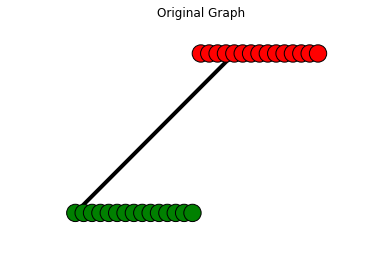

In [8]:
if __name__=="__main__":
    # Creating Object 1 with initial points. 
    N=30
    #
    Obj1=spectralClust(N)
    # Calling the objCreate function
    cSpectral1=objCreate(Obj1,1)
cSpectral1

# Plotting Embeddings (eigs) for Original graph

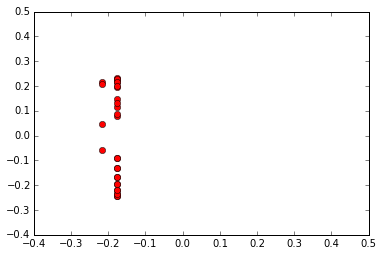

In [9]:
plt.axis([-0.4,0.5,-0.4,0.5])
plt.plot(Obj1.Y[:,0],Obj1.Y[:,1],'ro')

#Q1.3(ii) Modifying adjacency matrix by adding three extra edges.

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0], dtype=int32)

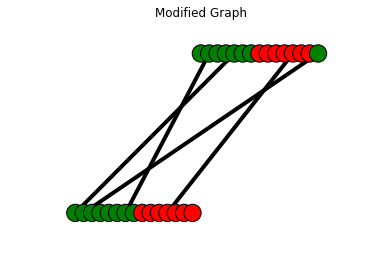

In [10]:
if __name__=="__main__":
# Creating another object
    edge=2
    Obj2=spectralClust(N,edge)
    cSpectral2=objCreate(Obj2,2)
cSpectral2


# Plotting Embeddings (eigs) of modified adjacency matrix 

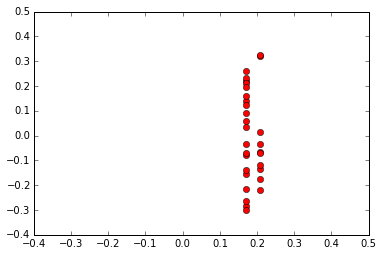

In [11]:
plt.axis([-0.4,0.5,-0.4,0.5])
plt.plot(Obj2.Y[:,0],Obj2.Y[:,1],'ro')

#Variation of cSpectral1 with cSpectral2

In [14]:
#Measuring variation
var=variation(cSpectral1,cSpectral2)
print("the variation is",var*100)

('the variation is', 50.0)
